## Import libraries needed for the analysis

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

### Import dataset and save it in a dataframe

In [4]:
df = pd.read_csv('./heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [5]:
data=df.values
y=data[:,12]
X=data[:,0:11]
X

array([[7.500e+01, 0.000e+00, 5.820e+02, ..., 1.300e+02, 1.000e+00,
        0.000e+00],
       [5.500e+01, 0.000e+00, 7.861e+03, ..., 1.360e+02, 1.000e+00,
        0.000e+00],
       [6.500e+01, 0.000e+00, 1.460e+02, ..., 1.290e+02, 1.000e+00,
        1.000e+00],
       ...,
       [4.500e+01, 0.000e+00, 2.060e+03, ..., 1.380e+02, 0.000e+00,
        0.000e+00],
       [4.500e+01, 0.000e+00, 2.413e+03, ..., 1.400e+02, 1.000e+00,
        1.000e+00],
       [5.000e+01, 0.000e+00, 1.960e+02, ..., 1.360e+02, 1.000e+00,
        1.000e+00]], shape=(299, 11))

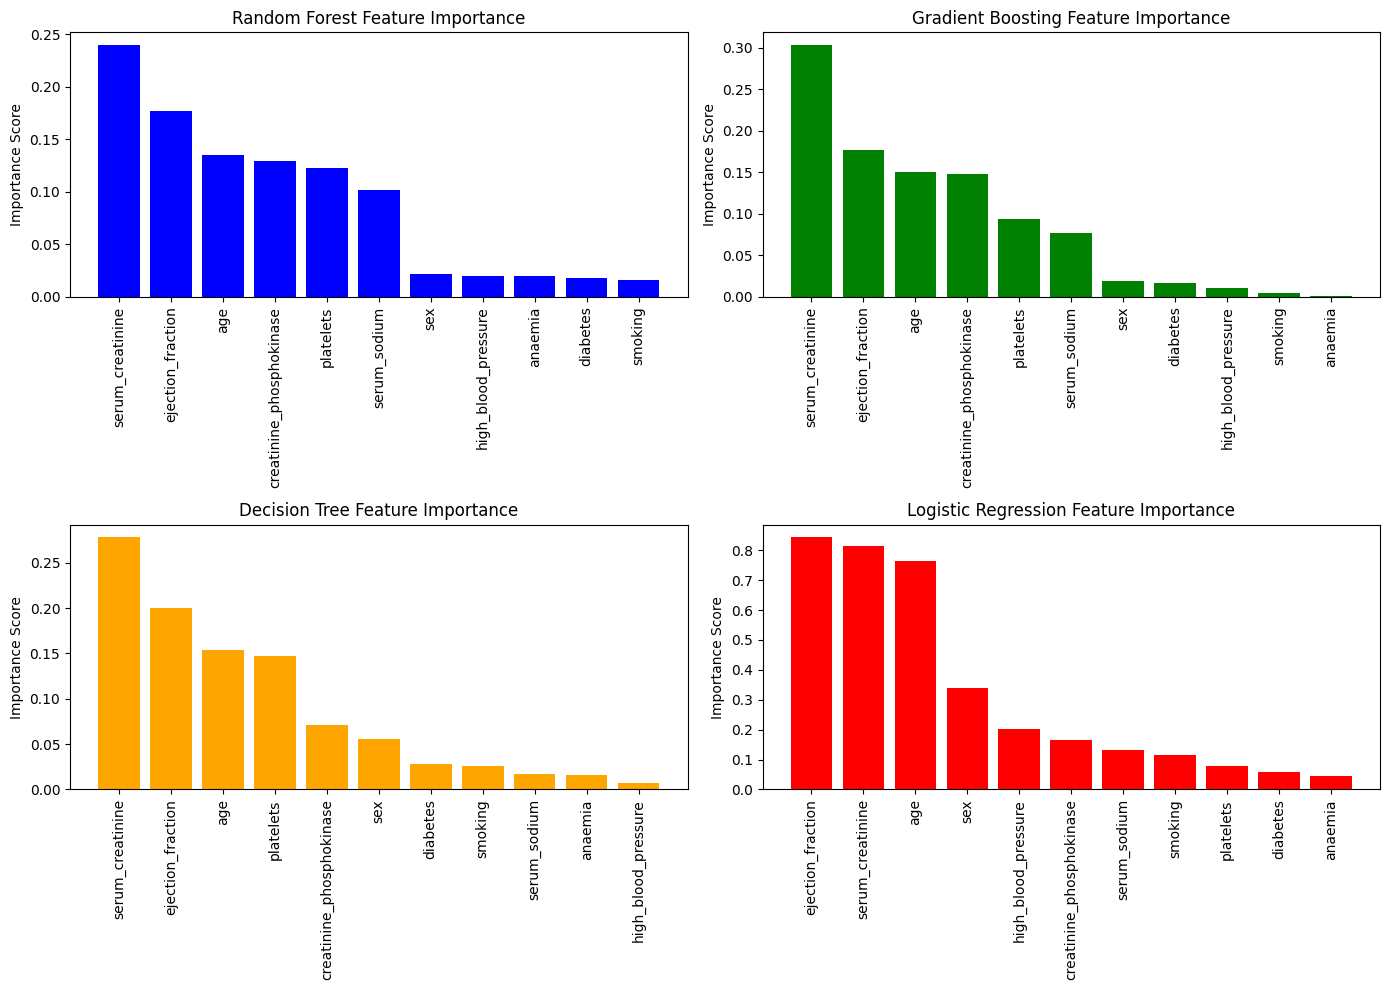

In [6]:
# Create synthetic binary classification dataset
feature_names = df.columns.values

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale data for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42)
}

# Train models and collect importances
importances_dict = {}

for name, model in models.items():
    if name == "Logistic Regression":
        model.fit(X_train_scaled, y_train)
        importances = np.abs(model.coef_[0])  # Use absolute value of coefficients
    else:
        model.fit(X_train, y_train)
        importances = model.feature_importances_
    
    importances_dict[name] = importances

colors={
    'Random Forest': 'blue',
    'Gradient Boosting': 'green',
    'Decision Tree': 'orange',
    'Logistic Regression': 'red'
}

# Plot feature importances
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

for i, (name, importances) in enumerate(importances_dict.items()):
    indices = np.argsort(importances)[::-1]
    axs[i].bar(range(len(importances)), importances[indices], align="center", color =colors[name])
    axs[i].set_xticks(range(len(importances)))
    axs[i].set_xticklabels([feature_names[j] for j in indices], rotation=90)
    axs[i].set_title(f"{name} Feature Importance")
    axs[i].set_ylabel("Importance Score")

plt.tight_layout()
plt.show()


In [10]:
import pandas as pd
import numpy as np
rows = []
for model_name, importances in importances_dict.items():
    for feature, importance in zip(feature_names, importances):
        rows.append({"Model": model_name, "Feature": feature, "Importance": float(importance)})
imp_df = pd.DataFrame(rows)
imp_df = imp_df.sort_values(["Model", "Importance"], ascending=[True, False])
top_k = 11
top_df = imp_df.groupby("Model").head(top_k).reset_index(drop=True)
top_df["Rank"] = (top_df.groupby("Model")["Importance"]
                  .rank(method="first", ascending=False)
                  .astype(int))
top_df = top_df[["Model", "Rank", "Feature", "Importance"]]
top_df = top_df.sort_values(["Model", "Rank"]).reset_index(drop=True)
top_df


,Model,Rank,Feature,Importance
0,Decision Tree,1,serum_creatinine,0.278067
1,Decision Tree,2,ejection_fraction,0.200705
2,Decision Tree,3,age,0.153637
3,Decision Tree,4,platelets,0.146672
4,Decision Tree,5,creatinine_phosphokinase,0.071344
5,Decision Tree,6,sex,0.055914
6,Decision Tree,7,diabetes,0.028339
7,Decision Tree,8,smoking,0.025834
8,Decision Tree,9,serum_sodium,0.017211
9,Decision Tree,10,anaemia,0.015744
